In [74]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [75]:
def σ(z):
    return 1/(1 + e**(-z))
def σ_prime(z):
    return e**(z) / (e**z + 1)**2

In [76]:
def Plot(fn, *args, **kwargs):
    argLength = len(args);
    if argLength == 1:
        start = args[0][0]
        end = args[0][1]
        points = None
        try: 
            points = args[0][2]
        except:
            pass
        if not points: points = 30
        xs = linspace(start, end, points);
        plot(xs, list(map(fn, xs)), **kwargs);

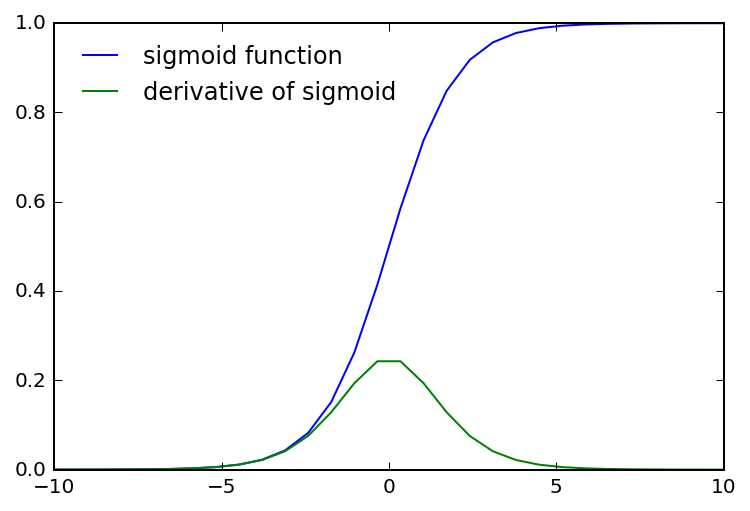

In [77]:
Plot(σ, [-10, 10], label="sigmoid function");
Plot(σ_prime, [-10, 10], label="derivative of sigmoid");
legend(loc = 2, frameon=False);

In [78]:
y = lambda neuron, input: neuron[0] * input + neuron[1]
α = lambda neuron, input: σ(y(neuron, input))
partial_w = lambda neuron, input: \
    σ_prime(y(neuron, input)) * input
partial_y = lambda neuron, input: \
    σ_prime(y(neuron, input))

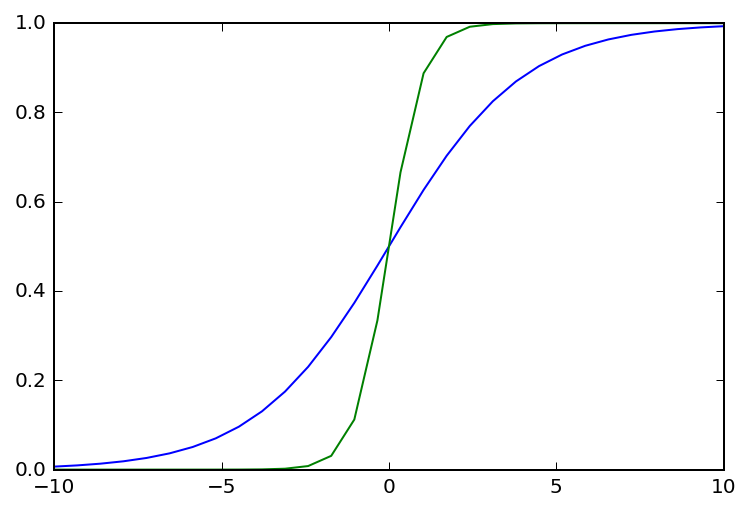

In [87]:
Plot(lambda x: α([0.5, 0], x), [-10, 10])
Plot(lambda x: α([2, 0], x), [-10, 10])

In [94]:
class Neuron():
    def __init__(self, neuron):
        self.neuron = neuron
        
    def output(self, input):
        return α(self.neuron, input)
    
    def set_η(self, η):
        self.η = η
        
    def train(self, input, target, η=None):
        result = self.output(input);
        δ = result - target
        p_w = δ * partial_w(self.neuron, input)
        p_y = δ * partial_y(self.neuron, input)
        
        gradient = np.array([p_w, p_y])#/np.sqrt(p_w**2 + p_y**2)
        if η is None:
            η = self.η
        self.neuron = - η * gradient + self.neuron;
        return result
        
    def train_a_lot(self, input, target, η, times):
        """this is more of a joke."""
        outputs = []
        for i in range(times):
            result = self.train(input, target, η)
            outputs.append(result)
        return outputs

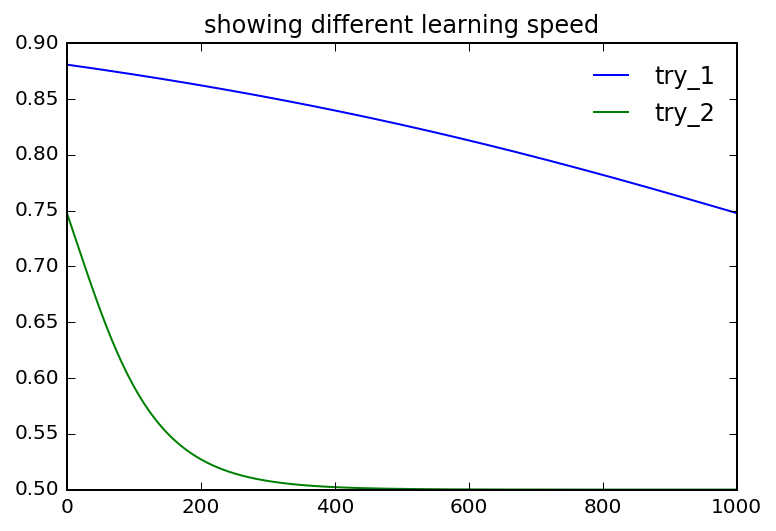

In [95]:
nw = Neuron([2, 0])
try_1 = nw.train_a_lot(1, 0.5, η = 0.01, times = 1000)
try_2 = nw.train_a_lot(1, 0.5, η = 0.1, times = 1000)
plot(try_1, label="try_1")
plot(try_2, label="try_2")
legend(frameon=False)
title('showing different learning speed');

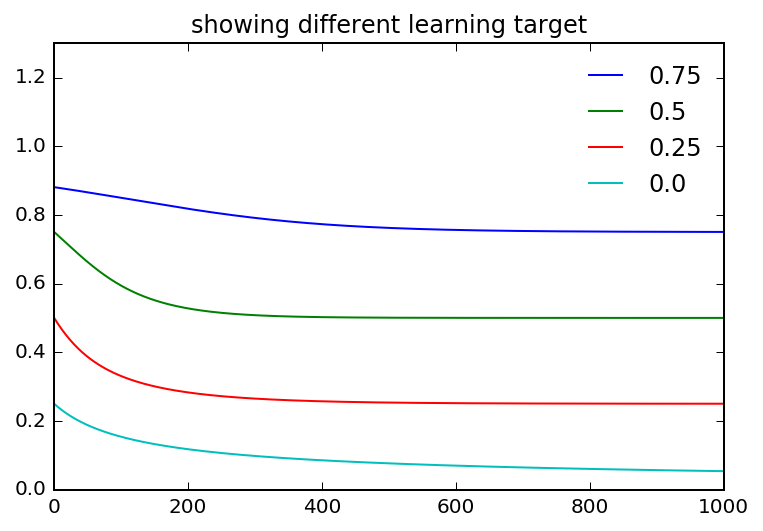

In [97]:
nw = Neuron([2, 0])
try_1 = nw.train_a_lot(1, 0.75, 0.1, 1000)
try_2 = nw.train_a_lot(1, 0.5, 0.1, 1000)
try_3 = nw.train_a_lot(1, 0.25, 0.1, 1000)
try_4 = nw.train_a_lot(1, 0.0, 0.1, 1000)
plot(try_1, label="0.75")
plot(try_2, label="0.5")
plot(try_3, label="0.25")
plot(try_4, label="0.0")
ylim(0, 1.3)
legend(frameon=False)
title('showing different learning target')